In [1]:
import torch

from PIL import Image
from lavis.models import load_model_and_preprocess

/opt/conda/lib/python3.8/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: /opt/conda/lib/python3.8/site-packages/torchvision/image.so: undefined symbol: _ZN3c106SymInt8toSymIntENS_13intrusive_ptrINS_14SymIntNodeImplENS_6detail34intrusive_target_default_null_typeIS2_EEEE
  warn(f"Failed to load image Python extension: {e}")
/opt/conda/lib/python3.8/site-packages/diffusers/models/cross_attention.py:30: FutureWarning: Importing from cross_attention is deprecated. Please import from diffusers.models.attention_processor instead.
  deprecate(


In [2]:
import torch

from PIL import Image
from lavis.models import load_model_and_preprocess

In [3]:
torch.cuda.is_available()

True

In [4]:
model, vis_preprocess, txt_preprocess = load_model_and_preprocess("blip_diffusion", "base", device="cuda", is_eval=True)

Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.
Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.
/opt/conda/lib/python3.8/site-packages/diffusers/configuration_utils.py:215: FutureWarning: It is deprecated to pass a pretrained model name or path to `from_config`.If you were trying to load a scheduler, please use <class 'diffusers.schedulers.scheduling_ddpm.DDPMScheduler'>.from_pretrained(...) instead. Otherwise, please make sure to pass a configuration dictionary instead. This functionality

No ctx_embeddings_cache found in /export/share/dongxuli/zerobooth/500000-renamed/


In [5]:
# finetuned_ckpt = "/export/home/workspace/dreambooth/diffusers/output/benchmark/checkpoints/230510040918-backpack_dog-120-5e-06-cache=True-textenc=False/110"
# finetuned_ckpt = "/export/home/workspace/LAVIS-Diffusion/LAVIS/lavis/output/debug/BLIP-diffusion/finetune/20230622062/checkpoint_40.pth"
# finetuned_ckpt = "/export/home/workspace/LAVIS-Diffusion/LAVIS/lavis/output/debug/BLIP-diffusion/finetune/20230622063/checkpoint_40.pth"
# finetuned_ckpt = "/export/home/workspace/LAVIS-Diffusion/LAVIS/lavis/output/debug/BLIP-diffusion/finetune/dog/20230622084/checkpoint_40.pth"
finetuned_ckpt = "/export/home/workspace/LAVIS-Diffusion/LAVIS/lavis/output/debug/BLIP-diffusion/finetune/dog/20230622084/checkpoint_40.pth"
model.load_checkpoint(finetuned_ckpt)

loading fine-tuned model from /export/home/workspace/LAVIS-Diffusion/LAVIS/lavis/output/debug/BLIP-diffusion/finetune/dog/20230622084/checkpoint_40.pth


In [19]:
src_subject = "dog"
tgt_subject = "dog"
prompt = "wearing a santa hat"
# prompt = "in oil painting"

src_subjects = [txt_preprocess["eval"](src_subject)]
tgt_subjects = [txt_preprocess["eval"](tgt_subject)]
prompt = [txt_preprocess["eval"](prompt)]

# image = Image.open("../images/dog.png").convert("RGB")
# input_images = vis_preprocess["eval"](image).unsqueeze(0).cuda()

# display(image.resize((256, 256)))

In [20]:
samples = {
    "input_images": None,
    "src_subject": src_subjects,
    "tgt_subject": tgt_subjects,
    "prompt": prompt,
}

Using cached BLIP embeddings


100%|██████████| 101/101 [00:07<00:00, 13.51it/s]


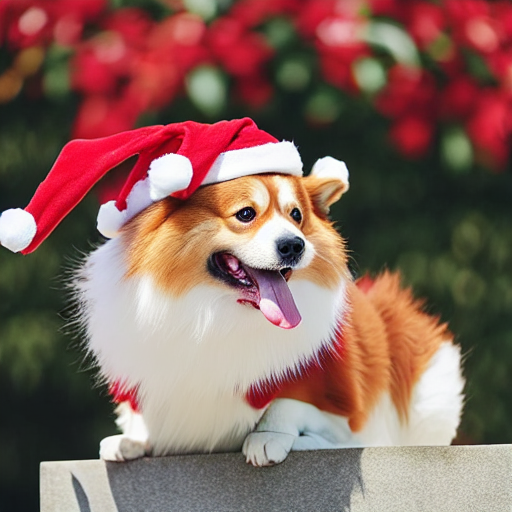

In [21]:
iter_seed = 8888
guidance_scale = 7.5
num_inference_steps = 100
negative_prompt = "over-exposure, under-exposure, saturated, duplicate, out of frame, lowres, cropped, worst quality, low quality, jpeg artifacts, morbid, mutilated, out of frame, ugly, bad anatomy, bad proportions, deformed, blurry, duplicate"

output = model.generate(
    samples,
    seed=iter_seed,
    guidance_scale=guidance_scale,
    num_inference_steps=num_inference_steps,
    neg_prompt=negative_prompt,
    height=512,
    width=512,
)

display(output[0])
